In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import momepy
import networkx as nx
from shapely.geometry import LineString
import pandas as pd

In [14]:
#streets = gpd.read_file(momepy.datasets.get_path("bubenec"), layer="streets")

In [26]:
#dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution/traffic_flow/vector/geojsons/datos_trafico_PED_19_16_52.geojson"
#df = gpd.read_file(dir)

In [2]:
stations_dir = "C:/Users/valer/Documents/CIC/doctorado/A24/Tesis/estacionesCAMEcsv.csv"
stations = pd.read_csv(stations_dir)

In [3]:
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_SAC.csv"
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/geojsons/Recolectados por mas tiempo/datos_trafico_MER.geojson"
df = gpd.read_file(dir)

In [ ]:
station = "MER"
folder = "traffic_images/"+station+"/"
for i in df.date.unique():
    df_date = df[df.date==i]
    for j in df_date.time.unique():
        df_time = df_date[df_date.time==j]
        bins = [0, 0.01,0.8,0.9999,1]  
        labels = ['Stocked', 'Congested', 'Moderate', 'Fluid']
        df_time['speed_range'] = pd.cut(df_time['traffic_level'], bins=bins, labels=labels,include_lowest=True)
        colours = {
            'Stocked':'white',
            'Congested': '#FF2323',
            'Moderate': '#FFFF37',
            'Fluid': '#2BC82B',
        }
        station_latitude = stations[stations["Key"]==station].Latitude
        station_longitude = stations[stations["Key"]==station].Longitude
        df_time['colour'] =df_time['speed_range'].map(colours)
        fig, ax = plt.subplots(figsize=(10, 10))
        df_time.plot(ax=ax, color= df_time['colour'])
        ax.set_axis_off()
        date = df_time.date.iloc[0].replace("-","_")
        time = df_time.time.iloc[0].replace(":","_")
        img_name = folder+station+"_"+date+"_"+time+".png"
        plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
        plt.scatter([station_longitude], [station_latitude], color='purple', marker='o', s=200, label='MER')
        plt.savefig(img_name, bbox_inches='tight', pad_inches=0)
        #plt.show()

In [56]:
d = df_time.reset_index(drop =True)
d

,traffic_level,roadCovrag,date,time,station,geometry,speed_range,colour
0,0.223,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",Congested,#FF2323
1,0.252,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12921 19.43033, -99.12826 19.4...",Congested,#FF2323
2,0.252,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12887 19.42603, -99.12863 19.4...",Congested,#FF2323
3,0.300,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",Congested,#FF2323
4,0.300,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",Congested,#FF2323
...,...,...,...,...,...,...,...,...
341,1.000,one_side,23-02-2024,13:56:17,MER,"LINESTRING (-99.11316 19.41508, -99.11353 19.4...",Fluid,#2BC82B
342,1.000,one_side,23-02-2024,13:56:17,MER,"LINESTRING (-99.11565 19.41533, -99.11556 19.4...",Fluid,#2BC82B
343,1.000,one_side,23-02-2024,13:56:17,MER,"LINESTRING (-99.11316 19.41723, -99.11326 19.4...",Fluid,#2BC82B
344,1.000,one_side,23-02-2024,13:56:17,MER,"LINESTRING (-99.11316 19.41723, -99.11326 19.4...",Fluid,#2BC82B


In [59]:
d.iloc[32]

traffic_level                                                  0.0
roadCovrag                                                    full
date                                                    23-02-2024
time                                                      13:56:17
station                                                        MER
geometry         LINESTRING (-99.12305250763893 19.428049983421...
speed_range                                                    NaN
colour                                                         NaN
Name: 32, dtype: object

In [34]:
for i in range(len(df_time)):
    print(i, df_time.speed_range[i])

0 Congested
1 Congested
2 Congested
3 Congested
4 Congested
5 Congested
6 Congested
7 Congested
8 Congested
9 Congested
10 Congested
11 Congested
12 Congested
13 Congested
14 Congested
15 Congested
16 Congested
17 Congested
18 Congested
19 Congested
20 Congested
21 Congested
22 Congested
23 Congested
24 Congested
25 Congested
26 Congested
27 Congested
28 Congested
29 Congested
30 Fluid
31 Fluid


KeyError: 32

In [17]:
df_time.traffic_level.max()

1.0

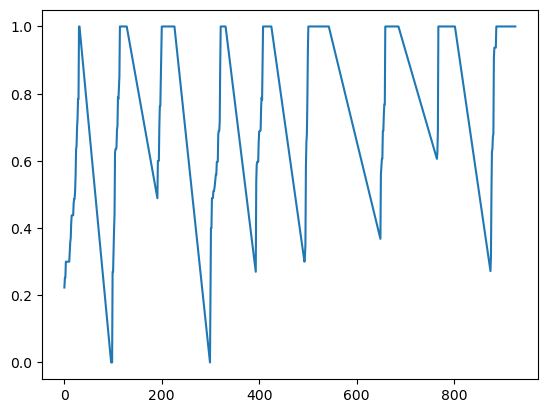

In [15]:
plt.plot(df_time.traffic_level)
plt.show()

In [14]:
has_nan = df['speed_range'].isna().any()
print(f"Column has NaN values: {has_nan}")

Column has NaN values: True


c:\Users\valer\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\valer\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


ValueError: Invalid RGBA argument: nan

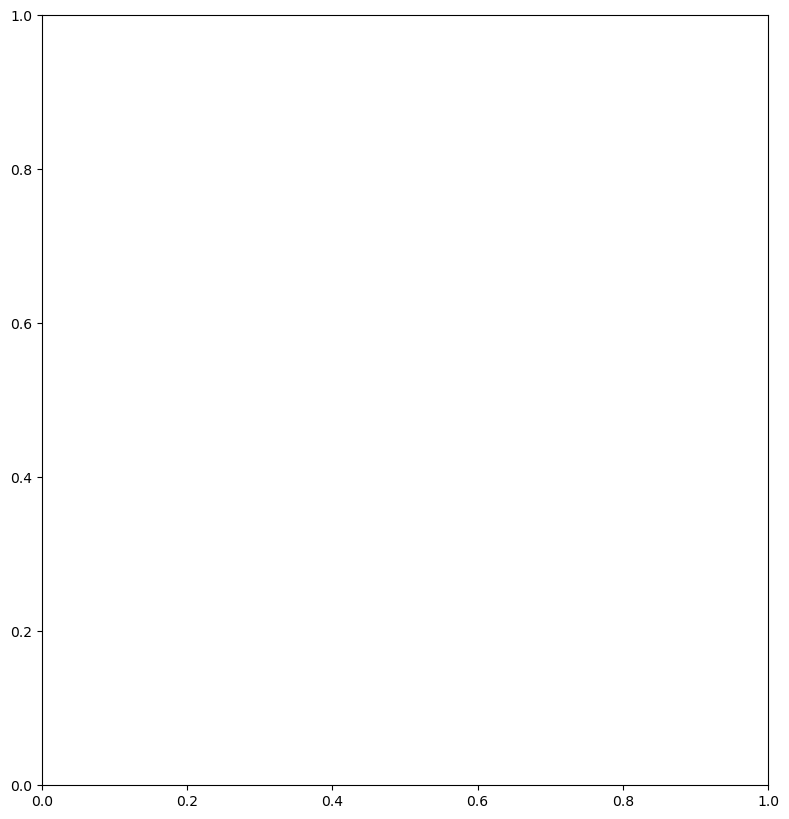

In [10]:
df_time = df_date[df_date.time==j]
bins = [0, 0.01,0.8,0.9999,1]  
labels = ['Stocked', 'Congested', 'Moderate', 'Fluid']
df_time['speed_range'] = pd.cut(df_time['traffic_level'], bins=bins, labels=labels)

colours = {
    'Stocked':'#777777',
    'Congested': '#FF2323',
    'Moderate': '#FFFF37',
    'Fluid': '#2BC82B',
}

df_time['colour'] =df_time['speed_range'].map(colours)
fig, ax = plt.subplots(figsize=(10, 10))
df_time.plot(ax=ax, color= df_time['colour'])
ax.set_axis_off()
date = df_time.date.iloc[0].replace("-","_")
time = df_time.time.iloc[0].replace(":","_")
img_name = station+"_"+date+"_"+time+".png"
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
plt.savefig(img_name, bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
bins = [0, 0.01,0.8,0.9999,1]  
labels = ['0-10 km/h', '11-40 km/h', '41-60 km/h', '61-180 km/h']
#streets_df['SPEED_CAT'] = streets_df['SPEED_CAT'].fillna(0).astype(int)  # Replacing NaNs with 0
#streets_df['speed_num'] = streets_df['SPEED_CAT'].astype(int)
#streets_df['speed_num'] = streets_df['speed_num'].dropna().astype(int)
df['rango_velocidad'] = pd.cut(df['traffic_level'], bins=bins, labels=labels)

colores = {
    '0-10 km/h':'#777777',
    '11-40 km/h': '#FF2323',
    '41-60 km/h': '#FFFF37',
    '61-180 km/h': '#2BC82B',
}

df['color'] =df['rango_velocidad'].map(colores)
fig, ax = plt.subplots(figsize=(10, 10))
df.plot(ax=ax, color= df['color'])
ax.set_axis_off()
#date = place_file.iloc[7][0][-6:]
date = df.date.iloc[0].replace("-","_")
time = df.time.iloc[0].replace(":","_")
img_name = date+time+".png"
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
plt.savefig(img_name, bbox_inches='tight', pad_inches=0)
plt.show()

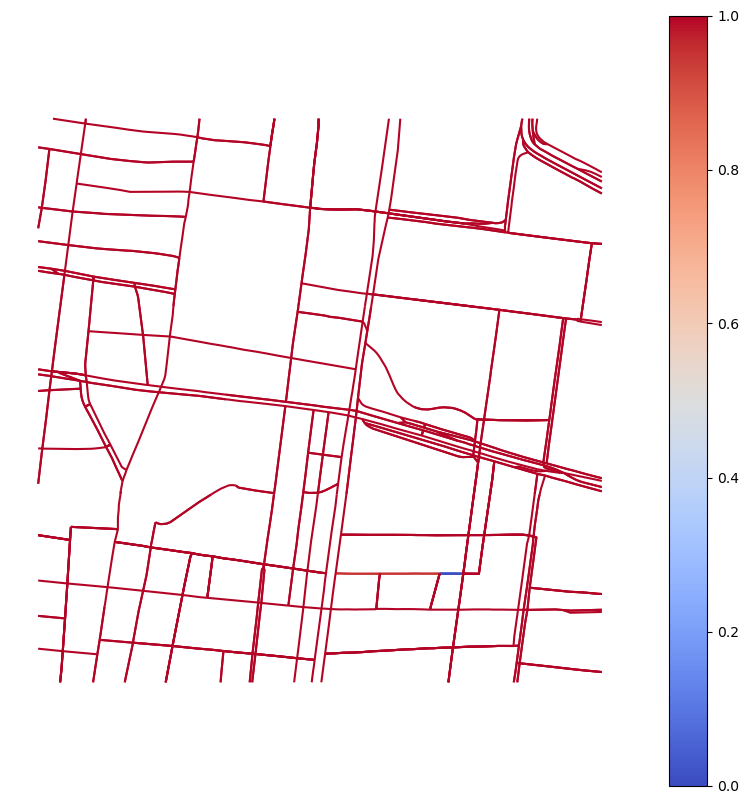

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
# Usar el argumento 'column' para asignar colores según el valor de 'traffic'
df_time.plot(column='traffic_level', cmap='coolwarm', legend=True, ax=ax)

# Eliminar los ejes si no los deseas
ax.set_axis_off()

# Guardar el gráfico si lo deseas
plt.savefig('calles_coloreadas_por_trafico.png', bbox_inches='tight', pad_inches=0)

# Mostrar el gráfico
plt.show()

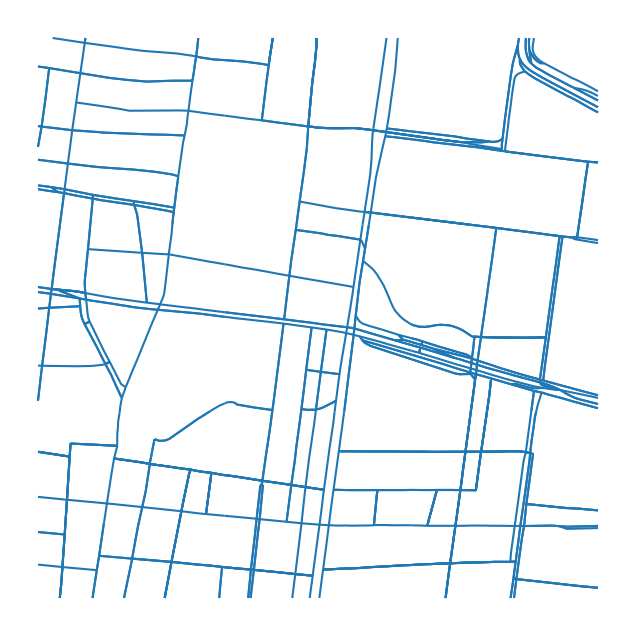

In [15]:
ax = df_time.geometry.plot(figsize=(8, 8))
ax.set_axis_off()

In [56]:
streets["geometry"] = df.geometry

In [57]:
streets

,geometry,position
0,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",0
1,"LINESTRING (-99.12921 19.43033, -99.12826 19.4...",1
2,"LINESTRING (-99.12887 19.42603, -99.12863 19.4...",2
3,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",3
4,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",4
5,"LINESTRING (-99.12551 19.42649, -99.12554 19.4...",5
6,"LINESTRING (-99.12498 19.42983, -99.12503 19.4...",6
7,"LINESTRING (-99.12498 19.42983, -99.12503 19.4...",7
8,"LINESTRING (-99.12532 19.42763, -99.12537 19.4...",8
9,"LINESTRING (-99.12532 19.42763, -99.12537 19.4...",9


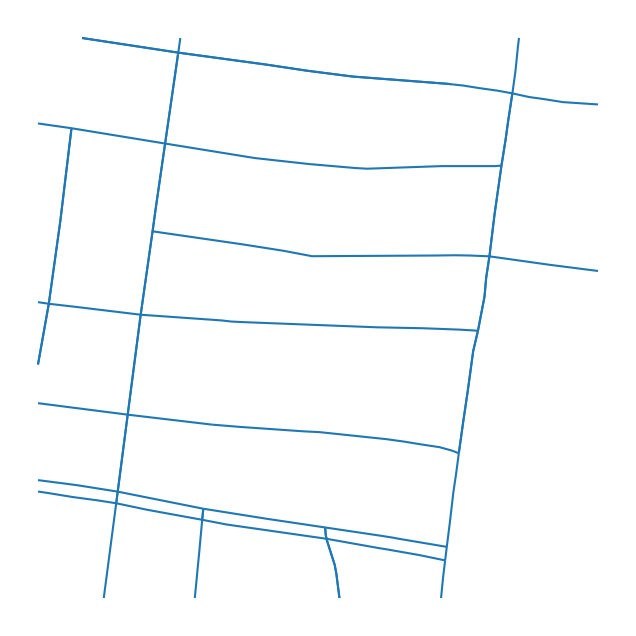

In [58]:
ax = streets.plot(figsize=(8, 8))
ax.set_axis_off()

In [59]:
graph = momepy.gdf_to_nx(streets, approach="primal")

c:\Users\valer\anaconda3\Lib\site-packages\momepy\utils.py:352: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


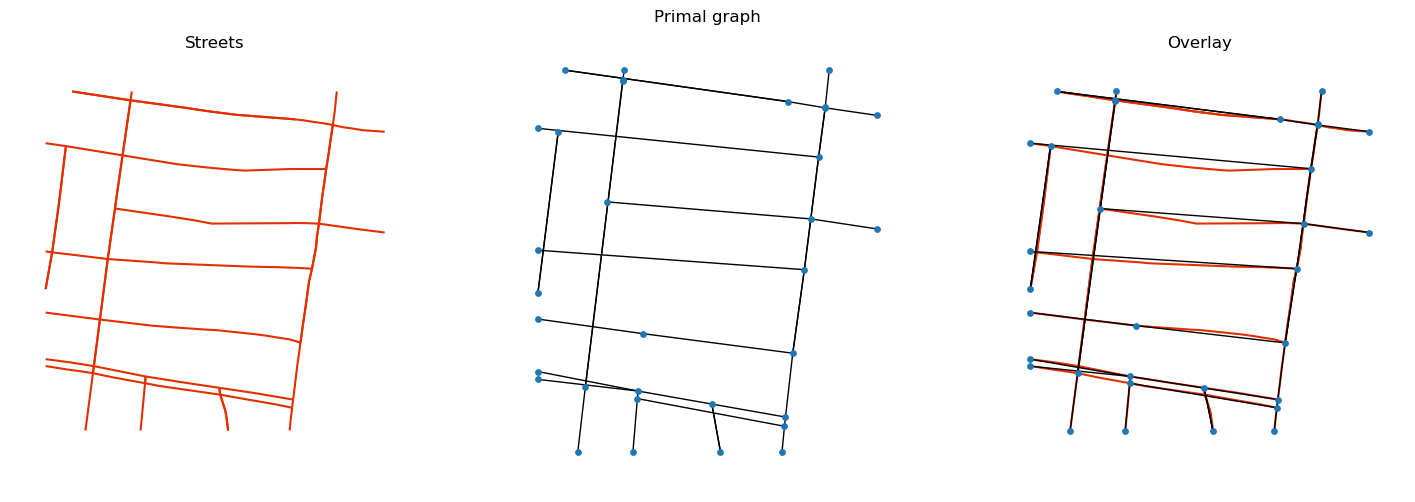

In [60]:
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
streets.plot(color="#e32e00", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Primal graph", "Overlay")[i])
    facet.axis("off")
nx.draw(
    graph, {n: [n[0], n[1]] for n in list(graph.nodes)}, ax=ax[1], node_size=15
)
streets.plot(color="#e32e00", ax=ax[2], zorder=-1)
nx.draw(
    graph, {n: [n[0], n[1]] for n in list(graph.nodes)}, ax=ax[2], node_size=15
)

In [61]:
dual = momepy.gdf_to_nx(streets, approach="dual")

c:\Users\valer\anaconda3\Lib\site-packages\momepy\utils.py:352: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
c:\Users\valer\anaconda3\Lib\site-packages\momepy\utils.py:184: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = gdf_network.geometry.centroid


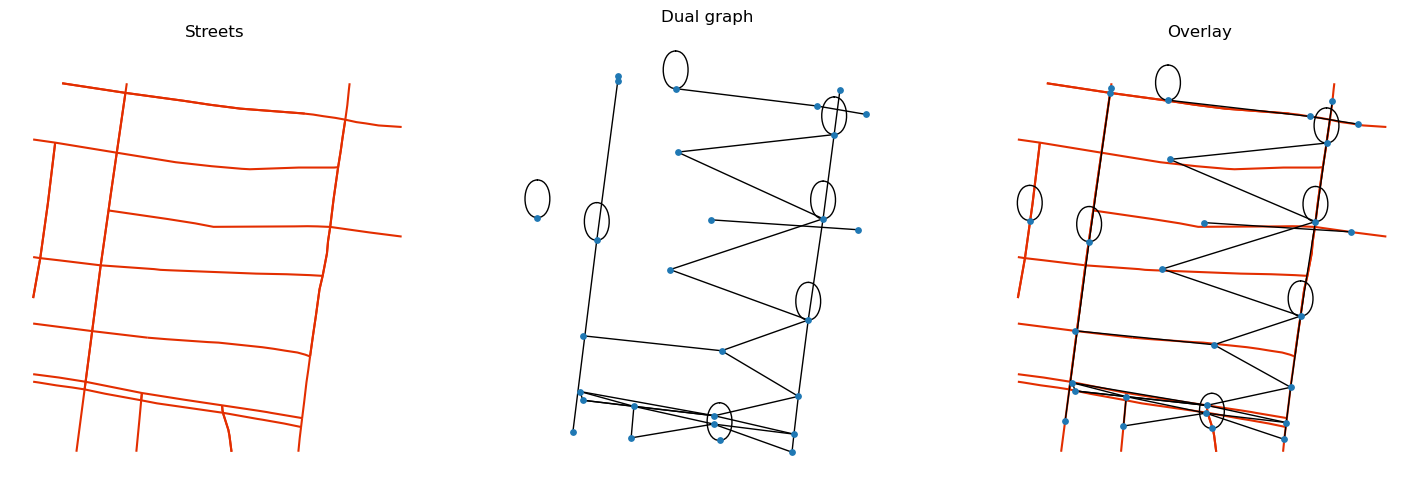

In [62]:
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
streets.plot(color="#e32e00", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Dual graph", "Overlay")[i])
    facet.axis("off")
nx.draw(
    dual, {n: [n[0], n[1]] for n in list(dual.nodes)}, ax=ax[1], node_size=15
)
streets.plot(color="#e32e00", ax=ax[2], zorder=-1)
nx.draw(
    dual, {n: [n[0], n[1]] for n in list(dual.nodes)}, ax=ax[2], node_size=15
)

In [63]:
degree = dict(nx.degree(graph))
nx.set_node_attributes(graph, degree, "degree")

In [64]:
graph = momepy.node_degree(graph, name="degree")

In [65]:
nodes, edges, sw = momepy.nx_to_gdf(
    graph, points=True, lines=True, spatial_weights=True
)

c:\Users\valer\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


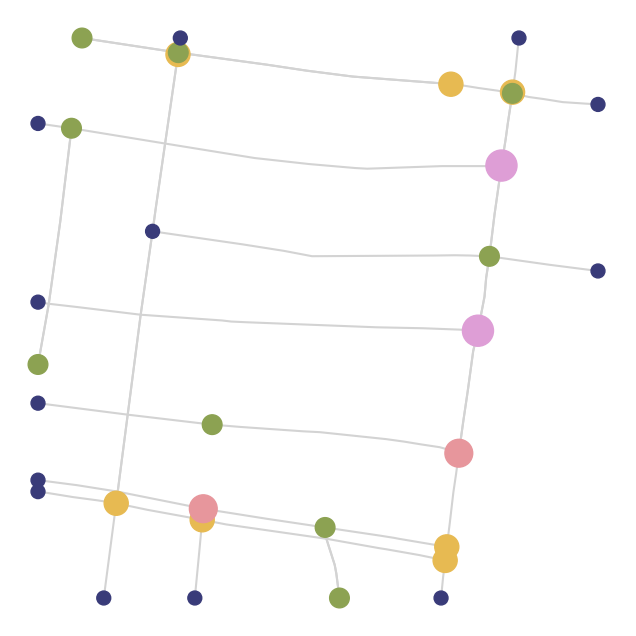

In [66]:
ax = nodes.plot(
    column="degree",
    cmap="tab20b",
    markersize=(nodes["degree"] * 100),
    zorder=2,
    figsize=(8, 8),
)
edges.plot(ax=ax, color="lightgrey", zorder=1)
ax.set_axis_off()

In [67]:
nodes.head(3)

,x,y,degree,nodeID,geometry
0,-99.126682,19.425154,2,0,POINT (-99.12668 19.42515)
1,-99.126822,19.425806,2,1,POINT (-99.12682 19.42581)
2,-99.129207,19.430334,2,2,POINT (-99.12921 19.43033)


In [68]:
edges.head(3)

,geometry,position,mm_len,node_start,node_end
0,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",0,0.000670,0,1
1,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",32,0.000670,0,1
2,"LINESTRING (-99.12921 19.43033, -99.12826 19.4...",1,0.003645,2,3


In [69]:
streets['position'] = range(len(streets))
streets.head()

,geometry,position
0,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",0
1,"LINESTRING (-99.12921 19.43033, -99.12826 19.4...",1
2,"LINESTRING (-99.12887 19.42603, -99.12863 19.4...",2
3,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",3
4,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",4


In [70]:
graph = momepy.gdf_to_nx(streets)
edges = momepy.nx_to_gdf(graph, points=False)
edges.head()

c:\Users\valer\anaconda3\Lib\site-packages\momepy\utils.py:352: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


,geometry,position,mm_len
0,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",0,0.000670
1,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",32,0.000670
2,"LINESTRING (-99.12921 19.43033, -99.12826 19.4...",1,0.003645
3,"LINESTRING (-99.12921 19.43033, -99.12826 19.4...",34,0.003645
4,"LINESTRING (-99.12559 19.42991, -99.12547 19.4...",27,0.000610


In [71]:
graph = momepy.gdf_to_nx(streets, preserve_index=True)
edges = momepy.nx_to_gdf(graph, points=False)
edges.head()

c:\Users\valer\anaconda3\Lib\site-packages\momepy\utils.py:352: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


,geometry,position,mm_len
0,"LINESTRING (-99.12668 19.42515, -99.12671 19.4...",0,0.000670
1,"LINESTRING (-99.12921 19.43033, -99.12826 19.4...",1,0.003645
2,"LINESTRING (-99.12887 19.42603, -99.12863 19.4...",2,0.004196
3,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",3,0.001546
4,"LINESTRING (-99.12509 19.42915, -99.12516 19.4...",4,0.001546


http://docs.momepy.org/en/stable/user_guide/graph/network.html